## Module loading and data preprocessing


#### Define my path

In [1]:
# Never change the path in the future!
MY_PATH = pwd()
@show MY_PATH
;

MY_PATH = "/home/bisardi/Dropbox/Research/Developing"


#### Upload packages

In [2]:
using Pkg
using DelimitedFiles
using Statistics 
using Plots
using FastaIO
using MultivariateStats
using StatsBase
using DelimitedFiles
import Plots.abline!
include(joinpath(MY_PATH, "../Packages/StuffDCA/src/energy.jl"))
include(joinpath(MY_PATH, "../Packages/StuffDCA/src/read_write.jl"))
include(joinpath(MY_PATH, "../Packages/StuffDCA/src/msa_tools.jl"))
;

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278
┌ Info: Precompiling FastaIO [a0c94c4b-ebed-5953-b5fc-82fe598ac79f]
└ @ Base loading.jl:1278
┌ Info: Precompiling MultivariateStats [6f286f6a-111f-5878-ab1e-185364afe411]
└ @ Base loading.jl:1278


#### Some functions

In [3]:
function find_d_closer_seq(ali, seq_ref)
    mini = size(ali)[2]
    for i in 1:size(ali)[1]
        seq = ali[i, :]
        mini = min(mini, count_muts(seq, seq_ref))
    end
    return mini
end


function plot_seq_PCA(seq, pc_comp, M; name = "PCA nat")
    
    M_data_nat = size(pc_comp)[2]
    
    p_nat = histogram2d(
    pc_comp[1, :],
    pc_comp[2, :],
    bins = (collect(-50:1:50), collect(-50:1:50)),
    xlabel = "z1",
    ylabel = "z2",
    title = "$name, M = $M_data_nat",
    labelfontsize = 10,
    xlims = [-50, 50],
    ylims = [-50, 50],
    color = :viridis,
    framestyle = :box,
    size = (400, 333)
    )


    pc_seq = transform(M, Float64.(seq))

    plot!(p_nat, 
    pc_seq[1, :],
    pc_seq[2, :],
    color = :red,
    seriestype = :scatter,
    markersize = 5,
    label = "seq"
    )

    display(p_nat)
end

;

#### Upload MSA in number format
Using   $\verb|map_gaps()|$   to change every $0$ into $21$ according to my definition of gaps.

In [27]:
ali_nat = fasta2matrix(joinpath(MY_PATH, "../Data/PF13354/ali/Beta-lactamase2.wo_ref_seqs.ali"));
ali_sampled_sparse = readdlm(joinpath(MY_PATH,"../Data/PF13354/sample/sample_resdecPierre3_saved_it360" ))
ali_sampled_sparse = map_gaps(ali_sampled_sparse)
ali_sampled_dense_le = readdlm(joinpath(MY_PATH,"../Data/PF13354/sample/sample_resPierre3_saved_it311" ))
ali_sampled_dense_le = map_gaps(ali_sampled_dense_le)
ali_sampled_dense_he = readdlm(joinpath(MY_PATH,"../Data/PF13354/sample/sample_resPierre3_saved_it500" ))
ali_sampled_dense_he = map_gaps(ali_sampled_dense_he)
;

#### Upload reference sequence

In [5]:
tem1 = fasta2matrix(joinpath(MY_PATH, "../Data/PF13354/ref/TEM-1_fantini_pfam.fa"))[1, :]
;

## PCA

#### Learn the model on natural sequences.

In [6]:
M = fit(PCA, Float64.(ali_nat'), maxoutdim = 2)
;

#### Get the components of the MSAs

In [28]:
pc_nat = transform(M, Float64.(ali_nat'))
pc_sampled_sparse = transform(M, Float64.(ali_sampled_sparse'))
pc_sampled_dense_le = transform(M, Float64.(ali_sampled_dense_le'))
pc_sampled_dense_he = transform(M, Float64.(ali_sampled_dense_he'))
pc_tem1 = transform(M, Float64.(tem1'))
;

#### Plot the principal components of the datasets

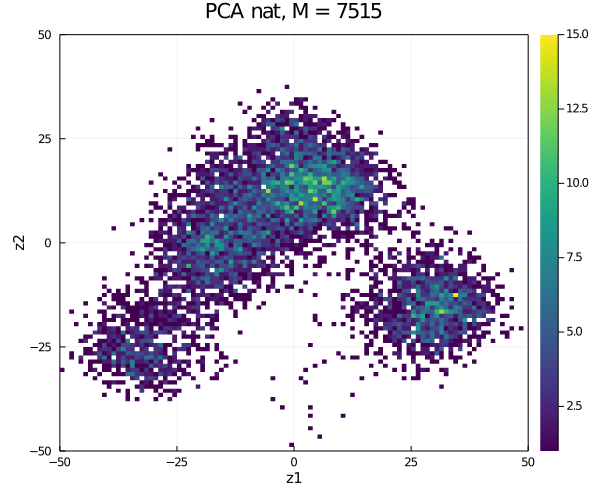

In [8]:
M_data_nat = size(ali_nat)[1]

p_nat = histogram2d(
    pc_nat[1, :],
    pc_nat[2, :],
    bins = (collect(-50:1:50), collect(-50:1:50)),
    xlabel = "z1",
    ylabel = "z2",
    title = "PCA nat, M = $M_data_nat",
    labelfontsize = 10,
    xlims = [-50, 50],
    ylims = [-50, 50],
    color = :viridis,
    framestyle = :box,
    size = (600, 500)
)


display(p_nat)


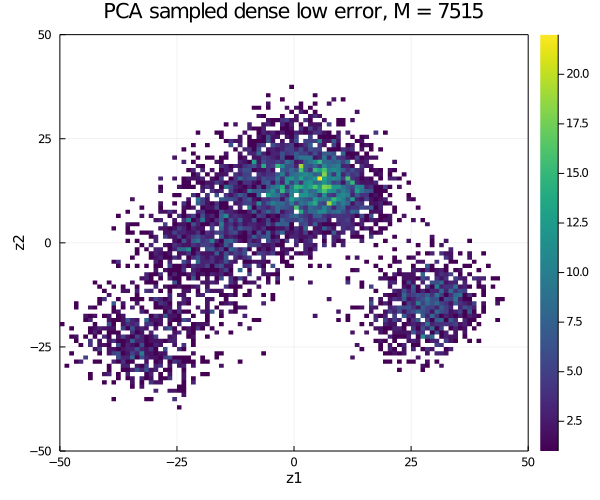

In [29]:
M_data_d_le = size(ali_sampled_dense_le)[1]

p_sdle = histogram2d(
    pc_sampled_dense_le[1, :],
    pc_sampled_dense_le[2, :],
    bins = (collect(-50:1:50), collect(-50:1:50)),
    xlabel = "z1",
    ylabel = "z2",
    title = "PCA sampled dense low error, M = $M_data_d_le",
    labelfontsize = 10,
    xlims = [-50, 50],
    ylims = [-50, 50],
    color = :viridis,
    framestyle = :box,
    size = (600, 500)
)


#Comment to see only  resampled sequences

#display(p_sdle)


#Subsample the MSA to match nat seqs

rand_nat = rand(1:M_data_d_le, M_data_nat);

p_sdle_res = histogram2d(
    pc_sampled_dense_le[1, rand_nat],
    pc_sampled_dense_le[2, rand_nat],
    bins = (collect(-50:1:50), collect(-50:1:50)),
    xlabel = "z1",
    ylabel = "z2",
    title = "PCA sampled dense low error, M = $M_data_nat",
    labelfontsize = 10,
    xlims = [-50, 50],
    ylims = [-50, 50],
    color = :viridis,
    framestyle = :box,
    size = (600, 500)
)

display(p_sdle_res)


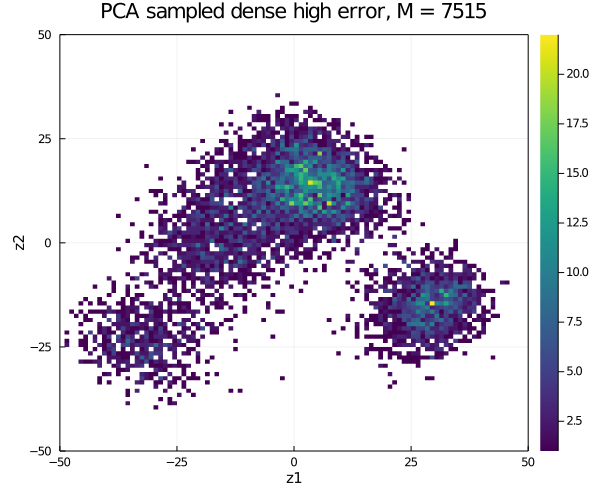

In [31]:
M_data_d_he = size(ali_sampled_dense_he)[1]

#Subsample the MSA to match nat seqs

rand_nat = rand(1:M_data_d_he, M_data_nat)

p_sdhe = histogram2d(
    pc_sampled_dense_he[1, rand_nat],
    pc_sampled_dense_he[2, rand_nat],
    bins = (collect(-50:1:50), collect(-50:1:50)),
    xlabel = "z1",
    ylabel = "z2",
    title = "PCA sampled dense high error, M = $M_data_nat",
    labelfontsize = 10,
    xlims = [-50, 50],
    ylims = [-50, 50],
    color = :viridis,
    framestyle = :box,
    size = (600, 500)
)

display(p_sdhe)

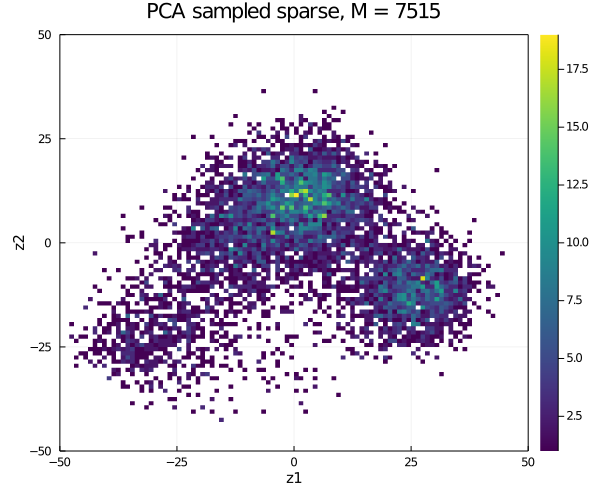

In [11]:
M_data_sparse = size(ali_sampled_sparse)[1]

#Subsample the MSA to match nat seqs

rand_nat = rand(1:M_data_sparse, M_data_nat)

p_ss = histogram2d(
    pc_sampled_sparse[1, rand_nat],
    pc_sampled_sparse[2, rand_nat],
    bins = (collect(-50:1:50), collect(-50:1:50)),
    xlabel = "z1",
    ylabel = "z2",
    title = "PCA sampled sparse, M = $M_data_nat",
    labelfontsize = 10,
    xlims = [-50, 50],
    ylims = [-50, 50],
    color = :viridis,
    framestyle = :box,
    size = (600, 500)
)

display(p_ss)

## Compare distribution of closest sequences

#### Naturals

In [12]:
ali = ali_nat
MM = M_data_nat

distances_nat = []
for i in 1:MM
    seq = ali[i, :]
    d_close = find_d_closer_seq(ali_nat[1:MM .!= i, :], seq)
    append!(distances_nat, d_close)
end
    

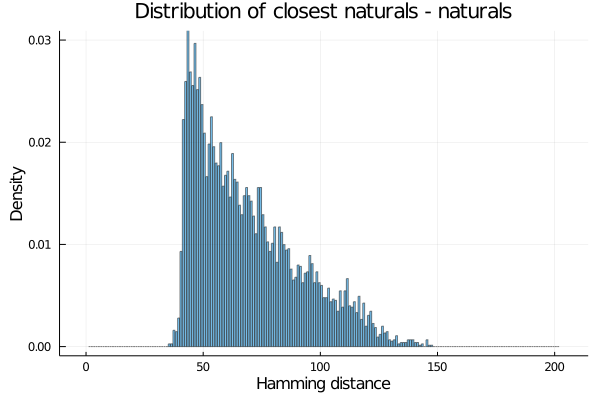

In [13]:
tit = "Distribution of closest naturals - naturals"
x_tit = "Hamming distance"
y_tit = "Density"


xx= collect(1:1:202)
histo = fit(Histogram, Float64.(distances_nat), xx)
norm = sum(histo.weights)
p = bar(xx, histo.weights/norm, 
    alpha = 0.5, 
    label = "",
    xaxis = x_tit, 
    yaxis = y_tit, 
    title = tit, 
    ylims = [0, 0.03])


#### Dense low error

In [14]:
ali = ali_sampled_dense_le
MM = M_data_d_le

distances_dle = []
for i in 1:MM
    seq = ali[i, :]
    d_close = find_d_closer_seq(ali_nat, seq)
    append!(distances_dle, d_close)
end
    

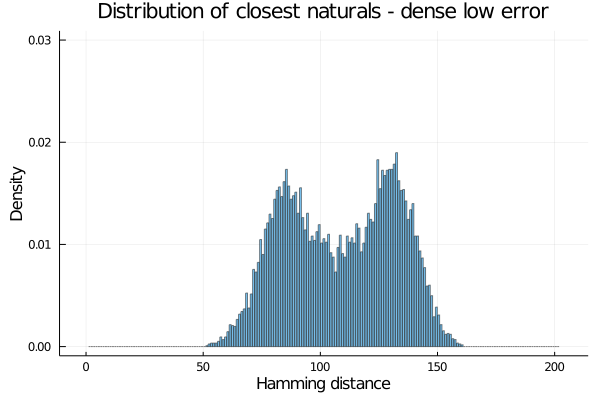

In [15]:
tit = "Distribution of closest naturals - dense low error"
x_tit = "Hamming distance"
y_tit = "Density"


xx= collect(1:1:202)
histo = fit(Histogram, Float64.(distances_dle), xx)
norm = sum(histo.weights)
p = bar(xx, histo.weights/norm, 
    alpha = 0.5, 
    label = "",
    xaxis = x_tit, 
    yaxis = y_tit, 
    title = tit, 
    ylims = [0, 0.03])


#### Dense high error

In [32]:
ali = ali_sampled_dense_he
MM = M_data_d_he

distances_dhe = []
for i in 1:MM
    seq = ali[i, :]
    d_close = find_d_closer_seq(ali_nat, seq)
    append!(distances_dhe, d_close)
end
    

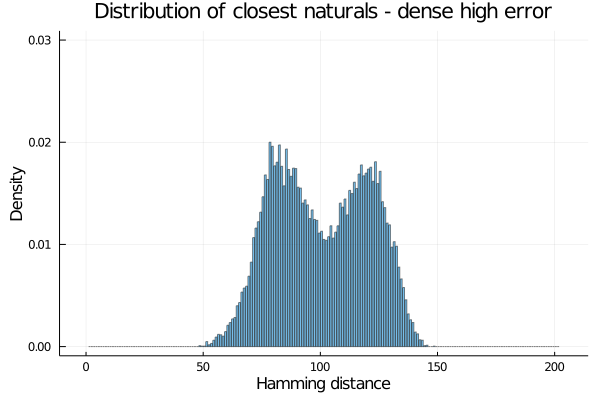

In [33]:
tit = "Distribution of closest naturals - dense high error"
x_tit = "Hamming distance"
y_tit = "Density"


xx= collect(1:1:202)
histo = fit(Histogram, Float64.(distances_dhe), xx)
norm = sum(histo.weights)
p = bar(xx, histo.weights/norm, 
    alpha = 0.5, 
    label = "",
    xaxis = x_tit, 
    yaxis = y_tit, 
    title = tit, 
    ylims = [0, 0.03])


#### Sparse

In [18]:
ali = ali_sampled_sparse
MM = M_data_sparse

distances_s = []
for i in 1:MM
    seq = ali[i, :]
    d_close = find_d_closer_seq(ali_nat, seq)
    append!(distances_s, d_close)
end
    

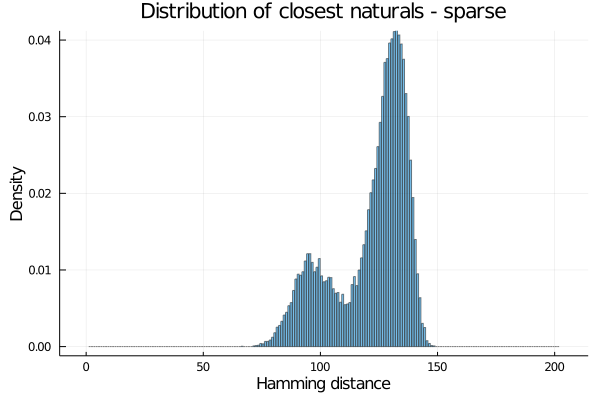

In [19]:
tit = "Distribution of closest naturals - sparse"
x_tit = "Hamming distance"
y_tit = "Density"


xx= collect(1:1:202)
histo = fit(Histogram, Float64.(distances_s), xx)
norm = sum(histo.weights)
p = bar(xx, histo.weights/norm, 
    alpha = 0.5, 
    label = "",
    xaxis = x_tit, 
    yaxis = y_tit, 
    title = tit, 
    ylims = [0, 0.04])

#### Check for a single sequence sampled from the sparse BM.

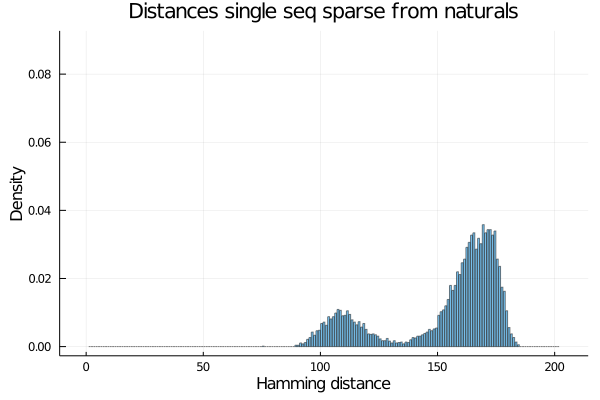

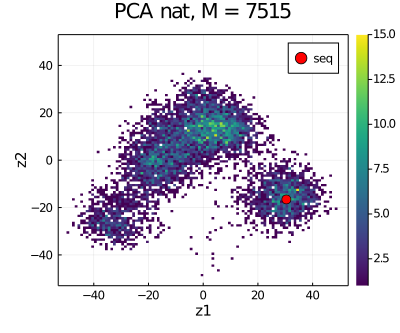

In [20]:
ali = ali_sampled_sparse

test_seq = ali[8000, :]

distr_dist = []

for i in 1:size(ali_nat)[1]
    seq = ali_nat[i, :]
    append!(distr_dist, count_muts(seq, test_seq))
end

tit = "Distances single seq sparse from naturals"

xx= collect(1:1:202)
histo = fit(Histogram, Float64.(distr_dist), xx)
norm = sum(histo.weights)
p = bar(xx, histo.weights/norm, 
    alpha = 0.5, 
    label = "",
    xaxis = x_tit, 
    yaxis = y_tit, 
    title = tit, 
    ylims = [0, 0.09])

display(p)


plot_seq_PCA(test_seq, pc_nat, M)

## Compare distribution of energies

#### Upload the parameters

In [62]:
PATH_PAR = joinpath(MY_PATH,"../Data/PF13354/par/Parameters_conv_Pierre.dat" )
h,J = read_par_BM(PATH_PAR, 21, 202)

PATH_PAR = joinpath(MY_PATH,"../Data/PF13354/par/Parameters_conv_decPierre.dat" )
h_dec,J_dec = read_par_BM(PATH_PAR, 21, 202)
;

#### Dense BM

In [92]:
en_ref = compute_energy_single_sequence(h, J, tem1)
en = [compute_energy_single_sequence(h, J, ali[i, :]) - en_ref for i in 1:size(ali, 1)]
muts = count_muts_msa(ali_nat, tem1)
;

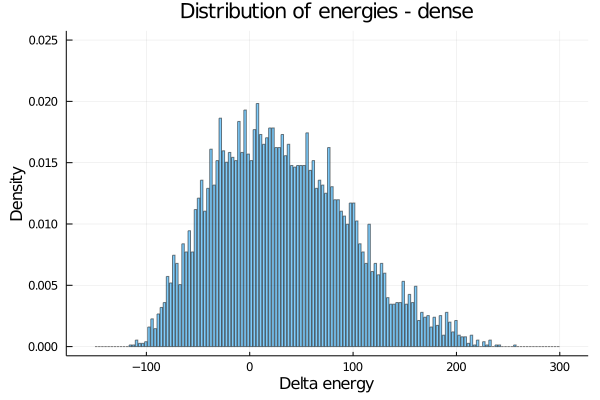

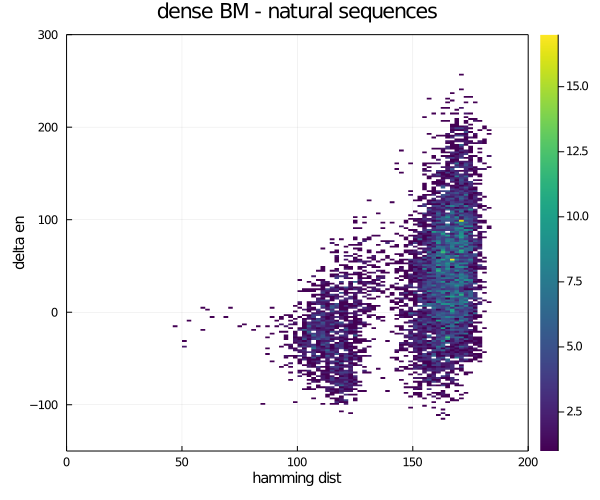

In [103]:
tit = "Distribution of energies - dense"
x_tit = "Delta energy"
y_tit = "Density"


xx= collect(-150:3:300)
histo = fit(Histogram, Float64.(en), xx)
norm = sum(histo.weights)
p = bar(xx, histo.weights/norm, 
    alpha = 0.5, 
    label = "",
    xaxis = x_tit, 
    yaxis = y_tit, 
    title = tit, 
    ylims = [0, 0.025])

display(p)

en_m = histogram2d(
    muts, en,
    bins = (collect(0:2:200), collect(-150:2:300)),
    xlabel = "hamming dist",
    ylabel = "delta en",
    title = "dense BM - natural sequences",
    labelfontsize = 10,
    xlims = [0, 200],
    ylims = [-150, 300],
    color = :viridis,
    framestyle = :box,
    size = (600, 500)
)

display(en_m)

In [99]:
en_ref_s = compute_energy_single_sequence(h_dec, J_dec, tem1)
en_s = [compute_energy_single_sequence(h_dec, J_dec, ali[i, :]) - en_ref_s for i in 1:size(ali, 1)]
;

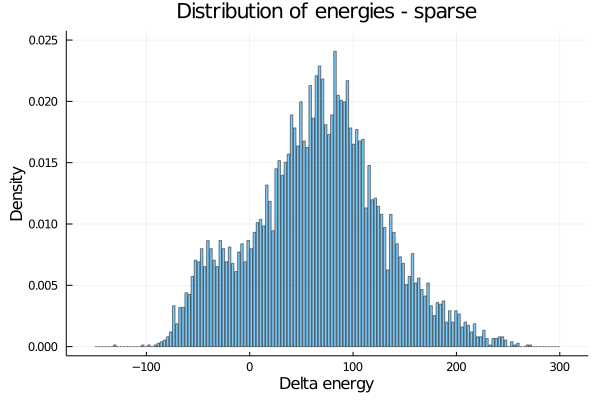

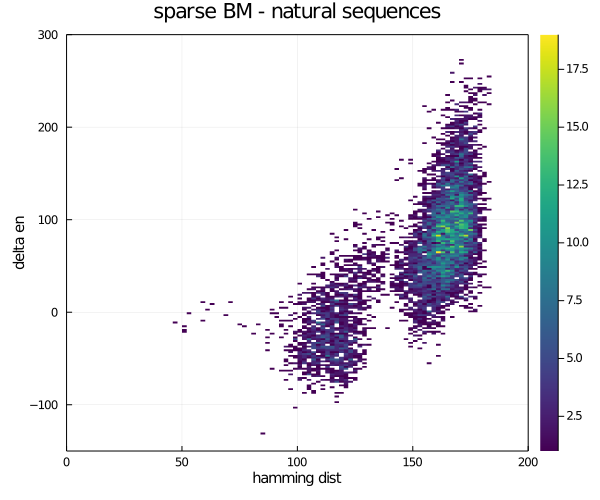

In [101]:
tit = "Distribution of energies - sparse"
x_tit = "Delta energy"
y_tit = "Density"


xx= collect(-150:3:300)
histo = fit(Histogram, Float64.(en_s), xx)
norm = sum(histo.weights)
p = bar(xx, histo.weights/norm, 
    alpha = 0.5, 
    label = "",
    xaxis = x_tit, 
    yaxis = y_tit, 
    title = tit, 
    ylims = [0, 0.025])

display(p)

en_m_s = histogram2d(
    muts, en_s,
    bins = (collect(0:2:200), collect(-150:2:300)),
    xlabel = "hamming dist",
    ylabel = "delta en",
    title = "sparse BM - natural sequences",
    labelfontsize = 10,
    xlims = [0, 200],
    ylims = [-150, 300],
    color = :viridis,
    framestyle = :box,
    size = (600, 500)
)

display(en_m_s)

## PCA data visualisation

#### Hamming distances

In [85]:
#ref_seq = ali_nat[5480, :]
ref_seq = tem1

dist = []

for i in 1:size(ali_nat)[1]
    seq = ali_nat[i, :]
    append!(dist, count_muts(seq, ref_seq))
end

histo = fit(Histogram, 
    (pc_nat[2, :],
    pc_nat[1, :]),
    Weights(  Float64.(dist)  ),
    (-50:1:50, -50:1:50),
    )

histo_base = fit(Histogram, 
    (pc_nat[2, :],
    pc_nat[1, :]),
    (-50:1:50, -50:1:50))
;

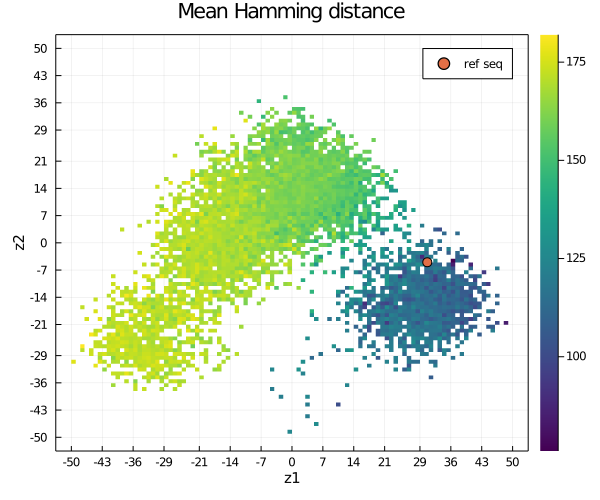

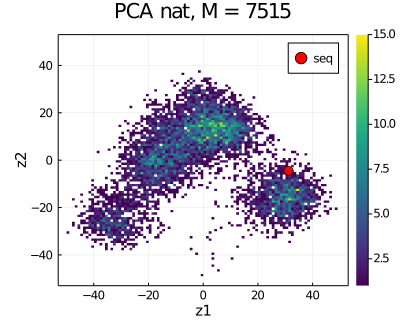

In [88]:
hm = heatmap(string.(collect(histo.edges[1])),
    string.(collect(histo.edges[2])),
    histo.weights./histo_base.weights,
    xlabel = "z1",
    ylabel = "z2",
    title = "Mean Hamming distance",
    labelfontsize = 10,
    color = :viridis,
    framestyle = :box,
    size = (600, 500)
)

pc_seq = transform(M, Float64.(ref_seq))

plot!(hm ,[pc_seq[1] + 50], [pc_seq[2] + 50], seriestype = :scatter, markersize = 5, label = "ref seq")

display(hm)

plot_seq_PCA(ref_seq, pc_nat, M)

#### Energies dense BM

In [47]:
ali = ali_nat

en_ref = compute_energy_single_sequence(h, J, tem1)
en = [compute_energy_single_sequence(h, J, ali[i, :]) - en_ref for i in 1:size(ali, 1)]

histo = fit(Histogram, 
    (pc_nat[2, :],
    pc_nat[1, :]),
    Weights(  Float64.(en)  ),
    (-50:1:50, -50:1:50),
    )

histo_base = fit(Histogram, 
    (pc_nat[2, :],
    pc_nat[1, :]),
    (-50:1:50, -50:1:50))
;


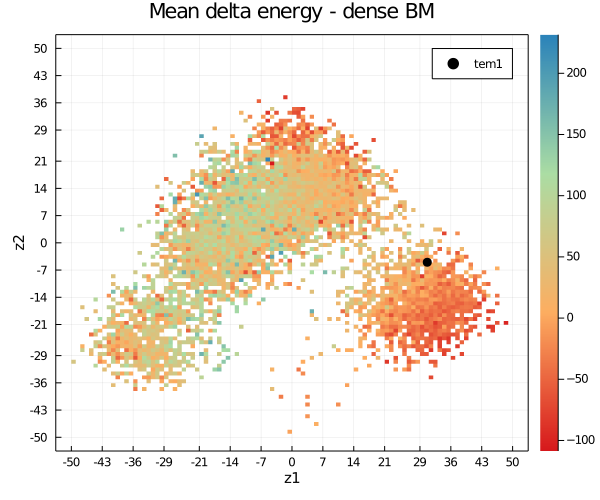

In [49]:
hm = heatmap(string.(collect(histo.edges[1])),
    string.(collect(histo.edges[2])),
    histo.weights./histo_base.weights,
    xlabel = "z1",
    ylabel = "z2",
    title = "Mean delta energy - dense BM",
    labelfontsize = 10,
    color = :Spectral_4,
    framestyle = :box,
    size = (600, 500)
)

pc_seq = transform(M, Float64.(tem1))

plot!(hm ,[pc_seq[1] + 50], [pc_seq[2] + 50], seriestype = :scatter, markersize = 5, label = "tem1", color = :black)

display(hm)

#plot_seq_PCA(tem1, pc_nat, M)

#### Energies sparse BM

In [72]:
ali = ali_nat

en_ref_s = compute_energy_single_sequence(h_dec, J_dec, tem1)
en_s = [compute_energy_single_sequence(h_dec, J_dec, ali[i, :]) - en_ref_s for i in 1:size(ali, 1)]

histo = fit(Histogram, 
    (pc_nat[2, :],
    pc_nat[1, :]),
    Weights(  Float64.(en_s)  ),
    (-50:1:50, -50:1:50),
    )

histo_base = fit(Histogram, 
    (pc_nat[2, :],
    pc_nat[1, :]),
    (-50:1:50, -50:1:50))
;


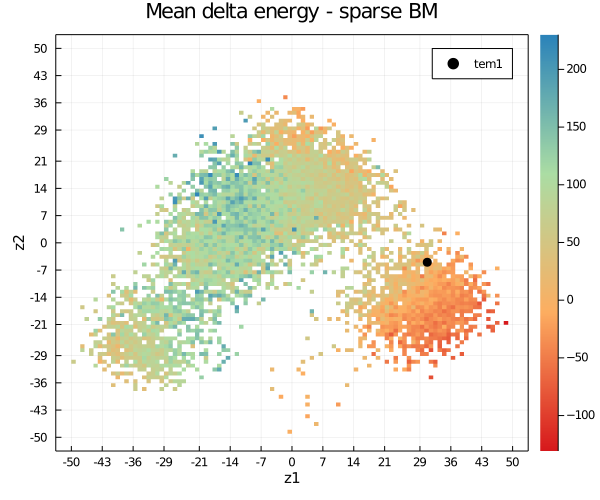

In [73]:
hm = heatmap(string.(collect(histo.edges[1])),
    string.(collect(histo.edges[2])),
    histo.weights./histo_base.weights,
    xlabel = "z1",
    ylabel = "z2",
    title = "Mean delta energy - sparse BM",
    labelfontsize = 10,
    color = :Spectral_4,
    framestyle = :box,
    size = (600, 500)
)

pc_seq = transform(M, Float64.(tem1))

plot!(hm ,[pc_seq[1] + 50], [pc_seq[2] + 50], seriestype = :scatter, markersize = 5, label = "tem1", color = :black)

display(hm)

#plot_seq_PCA(tem1, pc_nat, M)